# NLP spam classifier

### Read in text data

In [1]:
import pandas as pd
import pyarabic as pa
from nltk.corpus import stopwords
pd.set_option('display.max_colwidth', 150)
fullCorpus = pd.read_csv('SMSSpamCollection.tsv', sep='\t', header=None)
fullCorpus.columns=('label', 'body')
fullCorpus.head()

,label,body
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. Yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


### Explore the dataset

In [2]:
fullCorpus.describe()

,label,body
count,5568,5568
unique,2,5165
top,ham,"Sorry, I'll call later"
freq,4822,30


In [3]:
fullCorpus['label'].value_counts()

ham     4822
spam     746
Name: label, dtype: int64

In [4]:
#Missing data
fullCorpus['label'].isnull().sum()

0

## Creating Features

In [5]:
def count_punc(text):
    from string import punctuation
    punctuation_len = sum([1 for char in text if  char in punctuation])
    return round( punctuation_len / (len(text) - text.count(' ')), 3) * 100

In [6]:
def count_capital(text):
    from string import ascii_uppercase
    capital_count = sum([1 for char in text if  char in ascii_uppercase])
    return round( capital_count / (len(text) - text.count(' ')), 3) * 100

In [7]:
fullCorpus['body_len'] = fullCorpus['body'].apply(lambda x: len(x) - x.count(" ") )

In [8]:
fullCorpus['punct_frac'] = fullCorpus['body'].apply(lambda x: count_punc(x))

In [9]:
fullCorpus['capital_frac'] = fullCorpus['body'].apply(lambda x: count_capital(x))

In [10]:
fullCorpus

,label,body,body_len,punct_frac,capital_frac
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. Yo...,160,2.5,1.9
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...,128,4.7,7.8
2,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1,4.1
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1,92.9
...,...,...,...,...,...
5563,spam,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-...",131,6.1,6.9
5564,ham,Will ü b going to esplanade fr home?,29,3.4,3.4
5565,ham,"Pity, * was in mood for that. So...any other suggestions?",48,14.6,4.2
5566,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,100,1.0,2.0


## Correlation detection

In [11]:
from matplotlib import pyplot as plt
import numpy as np

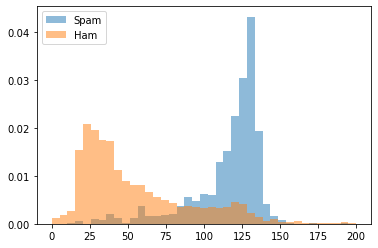

In [12]:
bins = np.linspace(0, 200, 40)
plt.hist(fullCorpus[fullCorpus['label'] == 'spam']['body_len'], bins, density=True, alpha=0.5, label='Spam')
plt.hist(fullCorpus[fullCorpus['label'] == 'ham']['body_len'], bins, density=True,  alpha=0.5, label='Ham')
plt.legend(loc='upper left')
plt.show()

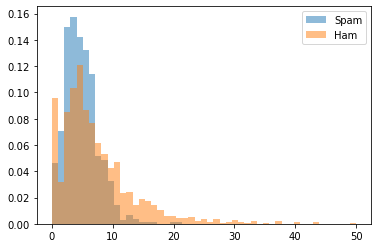

In [13]:
bins = np.linspace(0, 50, 50)
plt.hist(fullCorpus[fullCorpus['label'] == 'spam']['punct_frac'], bins, density=True, alpha=0.5, label='Spam')
plt.hist(fullCorpus[fullCorpus['label'] == 'ham']['punct_frac'], bins, density=True,  alpha=0.5, label='Ham')
plt.legend(loc='upper right')
plt.show()

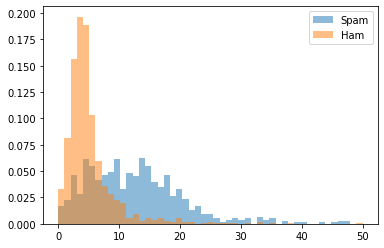

In [14]:
bins = np.linspace(0, 50, 50)
plt.hist(fullCorpus[fullCorpus['label'] == 'spam']['capital_frac'], bins, density=True, alpha=0.5, label='Spam')
plt.hist(fullCorpus[fullCorpus['label'] == 'ham']['capital_frac'], bins, density=True,  alpha=0.5, label='Ham')
plt.legend(loc='upper right')
plt.show()

## Feature transformation

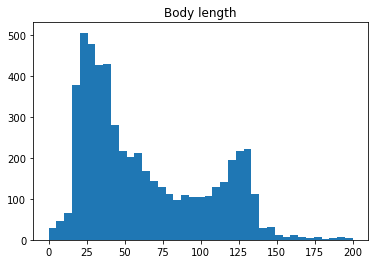

In [15]:
bins = np.linspace(0, 200, 40)
plt.hist(fullCorpus['body_len'], bins)
plt.title('Body length')
plt.show()

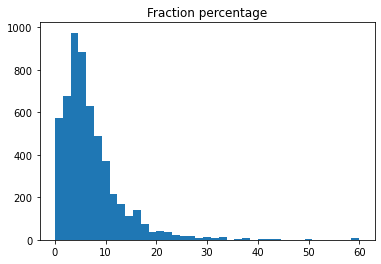

In [16]:
bins = np.linspace(0, 60, 40)
plt.hist(fullCorpus['punct_frac'], bins)
plt.title('Fraction percentage')
plt.show()

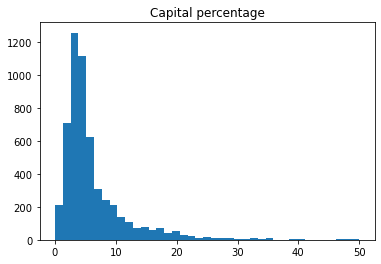

In [17]:
bins = np.linspace(0, 50, 40)
plt.hist(fullCorpus['capital_frac'], bins)
plt.title('Capital percentage')
plt.show()

[]

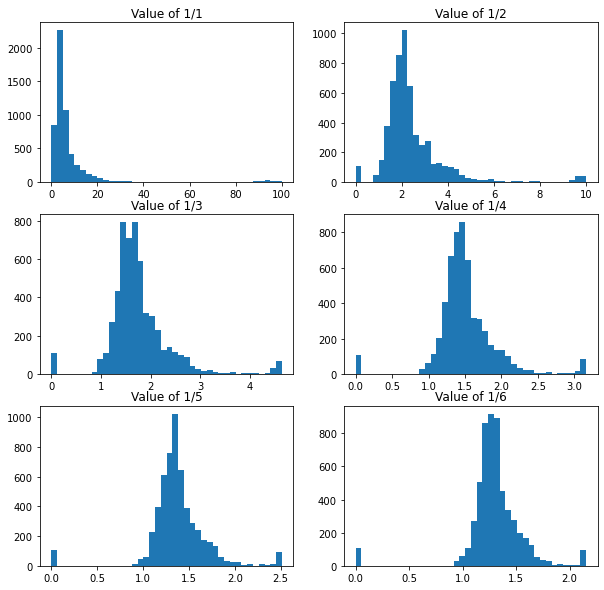

In [18]:
nrow = 3; ncol = 2;
fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(10,10))

bins = np.linspace(0, 50, 40)

vals = [1, 2, 3, 4, 5, 6]
for i,(v, sax) in enumerate(zip(vals, ax.reshape(-1))):
    sax.hist(fullCorpus['capital_frac'] ** (1.0/v) , bins=40)
    sax.title.set_text(f'Value of 1/{v}')
plt.plot()

In [19]:
fullCorpus['capital_frac']  = fullCorpus['capital_frac'].apply(lambda x: x ** 0.25)
fullCorpus['punct_frac']  = fullCorpus['punct_frac'].apply(lambda x: x ** 0.25)

In [20]:
fullCorpus.head()

,label,body,body_len,punct_frac,capital_frac
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. Yo...,160,1.257433,1.174055
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...,128,1.472395,1.671182
2,ham,"Nah I don't think he goes to usf, he lives around here though",49,1.422971,1.422971
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,1.337481,1.337481
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,1.632355,3.104588


# Preprocessing: Cleaning

### Remove punctuation marks

In [21]:
def remove_punctuation(text):
    from string import punctuation
    return [c.lower() for c in text if c not in punctuation]

### Tokenization

In [22]:
def tokenize(text):
    import re
    return re.split(r'\W+', text)

### Remove stop words

In [23]:
def remove_stop_words(tokenized_list):
    from nltk.corpus import stopwords
    stopwords = stopwords.words('english')
    return [token for token in tokenized_list if token not in stopwords]

### Stemming

In [24]:
def stem_tokens(tokens):
    from nltk import PorterStemmer
    ps = PorterStemmer()
    return [ps.stem(word) for word in tokens] 

def lemmitize_tokens(tokens):
    from nltk import WordNetLemmatizer
    wnl = WordNetLemmatizer()
    return [wnl.lemmatize(word) for word in tokens]
    

In [25]:
def preprocess(text):
    new_text = tokenize(text)
    new_text = remove_punctuation(new_text)
    new_text = remove_stop_words(new_text)
    new_text = stem_tokens(new_text)
    return " ".join(new_text)

## Count Vectorizer

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(preprocessor=preprocess,
                    min_df = 2,
                    ngram_range=(1,2))

In [27]:
X = cv.fit_transform(fullCorpus['body'])

In [28]:
cv.get_feature_names()

['00',
 '00 per',
 '00 sub',
 '000',
 '000 bonu',
 '000 cash',
 '000 homeown',
 '000 pound',
 '000 prize',
 '000 xma',
 '008704050406',
 '008704050406 sp',
 '01223585334',
 '01223585334 cum',
 '02',
 '02 06',
 '02 09',
 '0207',
 '0207 153',
 '02073162414',
 '02073162414 cost',
 '021',
 '021 3680',
 '03',
 '03 05',
 '03 2nd',
 '03 final',
 '04',
 '05',
 '050703',
 '050703 csbcm4235wc1n3xx',
 '0578',
 '06',
 '06 03',
 '07',
 '07 11',
 '07123456789',
 '07123456789 87077',
 '07734396839',
 '07734396839 ibh',
 '07742676969',
 '07742676969 show',
 '0776xxxxxxx',
 '0776xxxxxxx invit',
 '07781482378',
 '07781482378 com',
 '07786200117',
 '07821230901',
 '07xxxxxxxxx',
 '07xxxxxxxxx 000',
 '08',
 '0800',
 '0800 169',
 '0800 1956669',
 '0800 542',
 '08000407165',
 '08000407165 18',
 '08000776320',
 '08000776320 repli',
 '08000839402',
 '08000839402 2stoptxt',
 '08000839402 call2optout',
 '08000930705',
 '08000930705 del',
 '08000930705 deliveri',
 '08000938767',
 '08000938767 updat',
 '080019503

## TF-IDF

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer(preprocessor=preprocess, min_df=5, ngram_range=(1,2))
X_tfidf = tfidf_vector.fit_transform(fullCorpus['body'])

In [30]:
X_tfidf

<5568x2320 sparse matrix of type '<class 'numpy.float64'>'
	with 44454 stored elements in Compressed Sparse Row format>

In [31]:
features = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vector.get_feature_names(), index=fullCorpus.index)
features = features.join( [fullCorpus['body_len'], fullCorpus['capital_frac'], fullCorpus['punct_frac']] )

In [32]:
outcome = fullCorpus['label']

In [33]:
features

,00,00 sub,000,000 bonu,000 cash,02,03,03 2nd,04,06,...,yo,yoga,yogasana,yr,yun,yup,zed,body_len,capital_frac,punct_frac
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160,1.174055,1.257433
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128,1.671182,1.472395
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49,1.422971,1.422971
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62,1.337481,1.337481
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28,3.104588,1.632355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131,1.620736,1.571565
5564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29,1.357906,1.357906
5565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48,1.431569,1.954736
5566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100,1.189207,1.000000


In [34]:
outcome

0        ham
1       spam
2        ham
3        ham
4        ham
        ... 
5563    spam
5564     ham
5565     ham
5566     ham
5567     ham
Name: label, Length: 5568, dtype: object

## Fitting a classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score, cross_validate


In [36]:
rf = RandomForestClassifier(max_depth=50,
                            min_samples_split=4,
                            min_samples_leaf=5,
                           )

k_fold = KFold(n_splits=5, shuffle=True)
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro'}
scores = cross_validate(rf, features, outcome, cv=k_fold, scoring=scoring, return_train_score=True)

In [37]:
scores

{'fit_time': array([2.33971214, 2.29237032, 2.36888576, 2.31680202, 2.37528872]),
 'score_time': array([0.05338717, 0.05080271, 0.06250668, 0.06089902, 0.05339193]),
 'test_acc': array([0.96858169, 0.98114901, 0.97127469, 0.96855346, 0.96855346]),
 'train_acc': array([0.97754827, 0.9766502 , 0.97754827, 0.97710438, 0.97934905]),
 'test_prec_macro': array([0.97540866, 0.98944724, 0.98417409, 0.97510247, 0.97552234]),
 'train_prec_macro': array([0.98559999, 0.98510578, 0.98561855, 0.98535442, 0.98661855]),
 'test_rec_micro': array([0.8945236 , 0.925     , 0.88148148, 0.89040679, 0.89646511]),
 'train_rec_micro': array([0.916408  , 0.91558171, 0.91954339, 0.91556592, 0.92281853])}

## Spliting Data

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(features, outcome, test_size=0.2, random_state=42)

In [40]:
rf = RandomForestClassifier(max_depth=50,
                            min_samples_split=4,
                            min_samples_leaf=5,
                           ).fit(X_train, y_train)

In [41]:
sorted(zip(rf.feature_importances_, X_train.columns), reverse=True)

[(0.07468068357196789, 'body_len'),
 (0.05415868705505176, 'capital_frac'),
 (0.05089519211425032, 'txt'),
 (0.04862618750803885, 'call'),
 (0.04441765722091983, 'free'),
 (0.033740385505822236, 'claim'),
 (0.029831395545338903, 'www'),
 (0.029311505904329307, 'mobil'),
 (0.02226161681187186, 'uk'),
 (0.02136409015457212, 'stop'),
 (0.018610059989242474, 'prize'),
 (0.017005032511208235, 'servic'),
 (0.015412656348265703, '150p'),
 (0.014321591051791918, 'text'),
 (0.01402903540220458, 'tone'),
 (0.012845883748483689, 'com'),
 (0.012744565056980376, 'repli'),
 (0.012659373418027153, '16'),
 (0.012394887919498361, '50'),
 (0.012290895300851647, 'min'),
 (0.010613067264369638, 'contact'),
 (0.010563342418596326, 'urgent'),
 (0.010069831704365236, 'win'),
 (0.00953585096676999, 'cash'),
 (0.009031624274672509, '18'),
 (0.00897992903797853, 'rington'),
 (0.008876392026931268, '1000'),
 (0.008828132309948994, 'award'),
 (0.008511345948941504, 'co uk'),
 (0.008352834987249157, 'nokia'),
 (0.

In [42]:
y_pred = rf.predict(X_train)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      3857
        spam       1.00      0.84      0.91       597

    accuracy                           0.98      4454
   macro avg       0.99      0.92      0.95      4454
weighted avg       0.98      0.98      0.98      4454



In [44]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_train, y_pred, pos_label='spam', average='binary')

(0.9960159362549801, 0.8375209380234506, 0.9099181073703367, None)

## Grid search

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
print(RandomForestClassifier())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [47]:
rf = RandomForestClassifier()
params = {'n_estimators': [50, 100, 300, 600], 'max_depth':[None, 30, 60, 120]}
gs = GridSearchCV(rf, param_grid=params, n_jobs=-1).fit(X_train, y_train)

In [48]:
best_rf = gs.best_estimator_.fit(X_train, y_train)

In [49]:
y_pred = best_rf.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3857
        spam       1.00      0.99      1.00       597

    accuracy                           1.00      4454
   macro avg       1.00      1.00      1.00      4454
weighted avg       1.00      1.00      1.00      4454



In [50]:
y_pred_test = best_rf.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.94       149

    accuracy                           0.98      1114
   macro avg       0.99      0.94      0.96      1114
weighted avg       0.98      0.98      0.98      1114



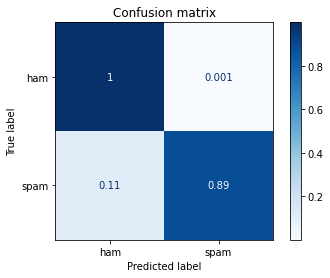

In [51]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(best_rf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp.ax_.set_title('Confusion matrix')

plt.show()